In [41]:
import rnnSMAP
import numpy as np
import pandas as pd
import torch
import argparse

In [42]:
import imp
imp.reload(rnnSMAP)
rnnSMAP.reload()

opt = rnnSMAP.classLSTM.optLSTM(
    rootDB=rnnSMAP.kPath['DB_L3_NA'],
    rootOut=rnnSMAP.kPath['Out_L3_NA'],
    syr=2017, eyr=2017,
    var='varLst_Forcing', varC='varConstLst_Noah',
    train='CONUSv16f1', dr=0.5, modelOpt='relu',
    target='SMAP_AM',gpu=0, loss='mse'
)

load rnnSMAP


In [ ]:
opt['model'] = 'torch'
opt['out'] = 'delta_cpu_lstm'
rnnSMAP.funLSTM.trainLSTM(opt)

out = opt['out']
rootOut = rnnSMAP.kPath['Out_L3_NA']
syr = 2015
eyr = 2016

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/APCP_FORA.csv 0.024023056030273438
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DLWRF_FORA.csv 0.021474123001098633
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/DSWRF_FORA.csv 0.014597892761230469
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/TMP_2_FORA.csv 0.014528036117553711
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SPFH_2_FORA.csv 0.014679193496704102
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/VGRD_10_FORA.csv 0.014405250549316406
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/UGRD_10_FORA.csv 0.014168977737426758
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.018004894256591797
Epoch 1 Loss 0.390 time 7.14
Epoch 2 Loss 0.194 time 6.83
Epoch 3 Loss 0.153 time 6.55
Epoch 4 Los

Epoch 238 Loss 0.041 time 7.26
Epoch 239 Loss 0.041 time 9.02
Epoch 240 Loss 0.040 time 11.94
Epoch 241 Loss 0.038 time 7.39
Epoch 242 Loss 0.040 time 9.30
Epoch 243 Loss 0.041 time 7.77
Epoch 244 Loss 0.040 time 8.45
Epoch 245 Loss 0.038 time 8.60
Epoch 246 Loss 0.041 time 8.89
Epoch 247 Loss 0.037 time 9.63
Epoch 248 Loss 0.037 time 8.86
Epoch 249 Loss 0.040 time 10.59
Epoch 250 Loss 0.038 time 10.03
Epoch 251 Loss 0.039 time 8.20
Epoch 252 Loss 0.038 time 7.56
Epoch 253 Loss 0.038 time 7.09
Epoch 254 Loss 0.037 time 8.20
Epoch 255 Loss 0.037 time 9.05
Epoch 256 Loss 0.038 time 10.03
Epoch 257 Loss 0.038 time 8.89
Epoch 258 Loss 0.039 time 7.15
Epoch 259 Loss 0.038 time 9.28
Epoch 260 Loss 0.038 time 9.12
Epoch 261 Loss 0.039 time 7.63
Epoch 262 Loss 0.035 time 7.83
Epoch 263 Loss 0.039 time 7.30
Epoch 264 Loss 0.036 time 6.80
Epoch 265 Loss 0.038 time 8.02
Epoch 266 Loss 0.039 time 8.28
Epoch 267 Loss 0.039 time 8.55
Epoch 268 Loss 0.038 time 7.04
Epoch 269 Loss 0.036 time 6.94
Epoc

Exception in callback BaseAsyncIOLoop._handle_events(14, 1)
handle: <Handle BaseAsyncIOLoop._handle_events(14, 1)>
Traceback (most recent call last):
  File "/usr/local/Cellar/python/3.6.5/Frameworks/Python.framework/Versions/3.6/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/usr/local/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 122, in _handle_events
    handler_func(fileobj, events)
  File "/usr/local/lib/python3.6/site-packages/tornado/stack_context.py", line 300, in null_wrapper
    return fn(*args, **kwargs)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/usr/local/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/usr/lo

In [43]:
out = 'delta_cpu_lstm'
testName = 'CONUSv16f1'
rootDB = rnnSMAP.kPath['DB_L3_NA']
rootOut = rnnSMAP.kPath['Out_L3_NA']

In [38]:
ds1 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2017])# define dataset
ds1.readData(var='SMAP_AM', field='SMAP')# read target
ds1.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')# read prediction
statErr1 = ds1.statCalError(predField='LSTM', targetField='SMAP')# calculate error

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2017/SMAP_AM.csv 0.030386924743652344
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/delta_cpu_lstm/test_CONUSv16f1_2017_2017_ep500.csv


In [39]:
ds2 = rnnSMAP.classDB.DatasetPost(rootDB=rootDB, subsetName=testName, yrLst=[2015, 2016])
ds2.readData(var='SMAP_AM', field='SMAP')
ds2.readPred(rootOut=rootOut, out=out, drMC=0, field='LSTM')
statErr2 = ds2.statCalError(predField='LSTM', targetField='SMAP')

/Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/Subset/CONUSv16f1.csv
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2015/SMAP_AM.csv 0.02583003044128418
read /Users/rajdesai/Desktop/Hydro/data/Daily_L3_NA/CONUSv16f1/2016/SMAP_AM.csv 0.022243976593017578
reading /Users/rajdesai/Desktop/Hydro/output/L3_NA/delta_cpu_lstm/test_CONUSv16f1_2015_2016_ep500.csv


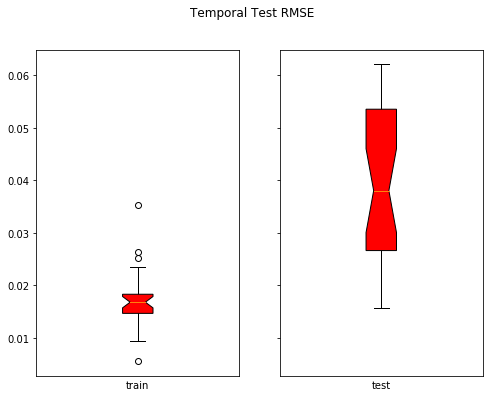

In [40]:
strE = 'RMSE'
dataErr = [getattr(statErr1, strE), getattr(statErr2, strE)]
fig = rnnSMAP.funPost.plotBox(dataErr, labelC=['train', 'test'], title='Temporal Test ' + strE)